## Instructions
* Read each cell and implement the **TODOs** sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Do not delete the **TODO** comment blocks.
* Aside from the TODOs, there will be questions embedded in the notebook and a cell for you to provide your answer (denoted with A:). Answer all the markdown/text cells with **"A: "** on them. 
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

Place your answers to the questions directly inline on the same cell as **A:**

For example:

<span style='color:red'>**Question 00:**</span> What is your favorite ice cream flavor?

<span style='color:red'>**A00:**</span> My favorite flavor ice cream flavor is pistachio.

# Assignment 2.2 - Computer Vision Notebook 
In this notebook, you will be experimenting on segmenting the rotting parts of a cacao pod using clustering and using SIFT features for detecting paintings.

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import glob

# Segmenting by Clustering

As a case study, we will be looking at an image of a cacao pod that is starting to rot. Our goal is to estimate the percentage of rotting. 
An example of the rotting cacao pod is shown below.

We will be using OpenCV library for the basic image processing functionalities. Note that by default, OpenCV loads the image in the BGR color space. Therefore, we need to convert it to RGB through this line Note that the default color space of OpenCV `image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`.

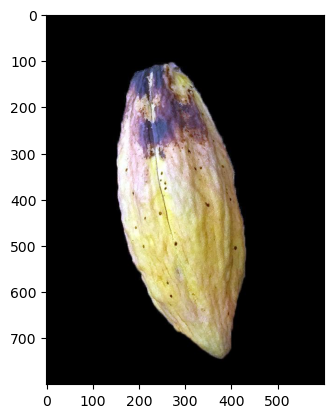

In [4]:
image = cv2.imread("cacao_pod_2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Since we do not have a large amount of labeled data, we won't be able to train a machine learning / deep learning model to separate the rotting parts from the healthy parts. Fortunately, the rotting manifests visually through discoloration, which means that we can leverage on colors to separate them! 

**Note** that for this exercise, we simplify the problem and just assume all the dark parts are the rotting parts.

## Clustering in RGB color space

Let's first try to cluster the image in the RGB color space. The image is loaded as a numpy array with a shape of (Height, Width, Channels), which means you can use your numpy knowledge to manipulate the image. 

In [14]:
print(type(image), image.shape)

<class 'numpy.ndarray'> (800, 600, 3)


<span style='color:red'>**TODO-01:**</span> Apply k-Means clustering on to the pixels of the image and visualize each of the clusters separately. This alows us to visually inspect how good we are able to separate the rotting parts from the healthy parts. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Note that you need to reshape the image array in order to fit the numpy array shape that KMeans expect and then reshape it back to form the image again.

You can add as many cells below as necessary.

<span style='color:red'>**Question 01:**</span> Experiment on different values of k from k=2, k=3, k=4, k=5. Which value of k performed the best? Justify your answer with the appropriate experiment / visualizations.

<span style='color:red'>**A01:**</span>

## Clustering in LAB color space

The RGB color space does not align well with how humans perceive color distances, which is why the clusters formed might not be what we expect. A better color space is the LAB color space.

Look at the documentation on how to convert to the CIE L\*a\*b\* colorspace https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html.

<span style='color:red'>**TODO-02:**</span> Repeat the same experiment and apply k-Means clustering on to the pixels of the image in the LAB color space. Visualize each of the clusters separately. 

You can add as many cells below as necessary.

<span style='color:red'>**Question 02:**</span> Similar to the previous question, experiment on different values of k from k=2, k=3, k=4, k=5. Which value of k performed the best? Justify your answer with the appropriate experiment / visualizations.

<span style='color:red'>**A02:**</span>

<span style='color:red'>**TODO-03:**</span> Repeat the same experiment and apply k-Means clustering, but this time **only on the AB channels, discarding the L channel**.

You can add as many cells below as necessary.

<span style='color:red'>**Question 03:**</span> Similar to the previous question, experiment on different values of k from k=2, k=3, k=4, k=5. Which value of k performed the best? Justify your answer with the appropriate experiment / visualizations.

<span style='color:red'>**A03:**</span>

<span style='color:red'>**Question 04:**</span> Which one performed better, the RGB, the full LAB, or the version with only AB channels? Explain why one would perform better than the other for this particular task.

<span style='color:red'>**A04:**</span>

## Scale Invariant Feature Transform (SIFT)

SIFT is a very popular feature representation that allows us to match objects across different images. Let's try it out in the context of matching / detecting paintings. As a case study, we will use the night watch painting by Rembrandt.

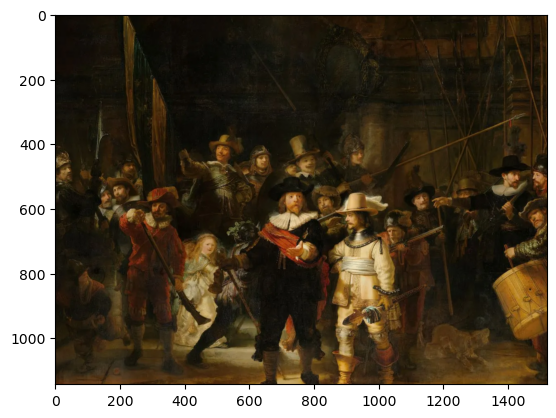

In [18]:
night_watch = cv2.imread("night_watch.png")
night_watch = cv2.cvtColor(night_watch, cv2.COLOR_BGR2RGB)
plt.imshow(night_watch)

Here's a set of images in a virtual painting gallery where the night watch painting is placed.

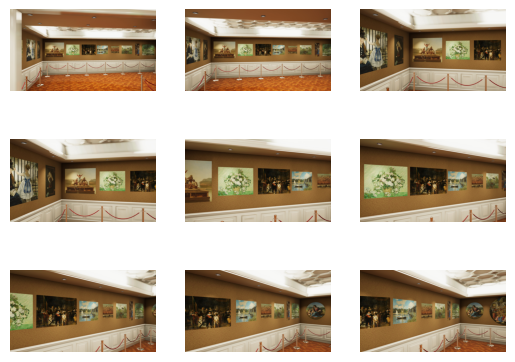

In [19]:
gallery_image_paths = glob.glob("painting_gallery/*.jpg")
for i, gallery_image_path in enumerate(sorted(gallery_image_paths)):
    gallery_image = cv2.imread(gallery_image_path)
    gallery_image = cv2.cvtColor(gallery_image, cv2.COLOR_BGR2RGB)

    plt.subplot(3,3,i+1)
    plt.imshow(gallery_image)
    plt.axis("off")

<span style='color:red'>**TODO-04:**</span> Detect the night watch painting using SIFT detector. Visualize the detections and draw a rectangular box around it, similar to the tutorials below.

Here are some resources that guides you into implementing your own SIFT detector:
- https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
- https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
- https://docs.opencv.org/4.x/d1/de0/tutorial_py_feature_homography.html (Shows you how to draw a rectangle box around the matching object)

You can add as many cells below as necessary.

Make a more systematic analysis of the robustness of the SIFT detector to different viewing angles. We can simulate this by simulating perspective distortions.

Here's a documentation on how to do perspective transforms using 4 reference points.

https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html#autotoc_md1348

The image below illustrates the warping by specifying the 4 source points and the 4 destination points. You can simply do the reverse, from a rectangle to a trapezoid to simulate perspective distortions of varying magnitudes.

<img src="perspective.png" style="margin:auto" />

<span style='color:red'>**TODO-05:**</span> First distort the template image, and show how the performance of the detector behaves as you increase the distortion.

You can add as many cells below as necessary.

<span style='color:red'>**TODO-06:**</span> Similarly, distort the query image, and show how the performance of the detector behaves as you increase the distortion.

You can add as many cells below as necessary.

<span style='color:red'>**Question 05:**</span> Which one performed better, the full LAB or the version with only AB channels? Explain why one would perform better than the other for this particular task.

<span style='color:red'>**A05:**</span>

<span style='color:red'>**Question:**</span> How much time did it take you to answer this notebook?

<span style='color:red'>**A:**</span>

<span style='color:red'>**Question:**</span> What parts of the assignment did you like and what parts did you not like?

<span style='color:red'>**A:**</span>

<span style='color:red'>**Question:**</span> How do you think it could be improved?

<span style='color:red'>**A:**</span>

<span style='color:red'>**Question:**</span> Do you have any case studies in mind that would be nice to suggest / include in the assignment?

<span style='color:red'>**A:**</span>